### Лабораторная работа 3. Ансамбли, отбор признаков

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.


### Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* Максимально допустимая оценка за работу — 15 баллов
* Сдавать задание после указанного срока сдачи нельзя
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса)
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировками
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

## Введение

Обратившись к Питеру Флаху, перечислим еще раз три ингридиента машинного обучения: задачи, модели и признаки.

Наш курс вводный, и темы извлечения признаков затрагивает очень неглубоко (на ум приходят модели мешка слов или использование дерева решений, как генератора категориального признака "номер листа"). 

На вводной лекции Саша Крайнов рассказывал вам о том, что в задачах машинного зрения применяется подход, когда одна нейронная сеть обучает и "извлекатель признаков" (на жаргоне -- тушка) и классификатор поверх данного слоя признаков (на жаргоне -- голову). 
В данной лабораторной работе (и сопряженным с ней конкурсе) мы возьмём предобученную нейронную сеть, входящую в набор моделей torchvision.models, и оставим от нее только "тушку". Таким образом у нас будет генератор признаков.

Мы сгенерировали для вас dataset с извлечёнными из картинок признаками.

Как вы понимаете, нет никаких гарантий, что данный набор признаков будет полезен для нашей задачи.

А значит, вы сможете:
  * применить методы отбора признаков 
  * обучить на лучших подмножествах модели, которые вы еще не испытвали в лабораторных
    * модели на основе растояний
    * деревья решений
    * ансамбли над деревьями решений.
  * отобрать лучшие модели
  
И получить таким образом хорошее baseline решение для конкурса.

In [ ]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)


In [ ]:
import sklearn
sklearn.__version__

'0.24.2'

## Задача и Dataset

Данные о задаче доступны в соревновании https://www.kaggle.com/t/c5b18ffd89ec43aa95477548b54f0e7e

Метрика -- AUC ROC

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('train.csv')
data.head()

,A_000,A_001,A_002,A_003,A_004,A_005,A_006,A_007,A_008,A_009,A_010,A_011,A_012,A_013,A_014,A_015,A_016,A_017,A_018,A_019,A_020,A_021,A_022,A_023,A_024,A_025,A_026,A_027,A_028,A_029,A_030,A_031,A_032,A_033,A_034,A_035,A_036,A_037,A_038,A_039,...,A_473,A_474,A_475,A_476,A_477,A_478,A_479,A_480,A_481,A_482,A_483,A_484,A_485,A_486,A_487,A_488,A_489,A_490,A_491,A_492,A_493,A_494,A_495,A_496,A_497,A_498,A_499,A_500,A_501,A_502,A_503,A_504,A_505,A_506,A_507,A_508,A_509,A_510,A_511,label
0,0.860262,0.973692,0.928669,0.983180,0.921490,0.893082,0.896374,1.166348,0.976090,0.934188,0.912729,0.868975,0.914681,0.914859,1.007735,0.937439,0.935197,1.374606,0.936181,0.839089,0.912236,1.079860,0.838939,0.972847,0.948931,0.924223,0.994887,0.991827,0.910431,0.915954,0.961817,0.833952,0.920645,0.837315,0.935941,0.934772,0.852414,0.984221,0.922098,0.929219,...,0.809198,0.824954,0.881290,0.890174,0.905775,0.945769,0.924460,0.910233,0.925957,0.868762,0.876558,1.162838,0.985964,0.924821,0.918486,1.162632,0.888264,1.063569,1.029007,0.940930,0.971603,0.848223,0.863683,0.884418,0.862322,0.975463,0.944161,0.937771,0.928885,0.884115,0.825269,0.867979,0.813514,1.094121,1.041853,0.994663,0.941488,1.060160,0.937741,0
1,0.974091,0.980219,0.867670,1.028374,0.982019,0.932177,0.963477,1.156632,0.862525,0.905283,0.898952,0.874881,0.892623,0.977929,0.925874,0.941095,0.961191,1.422071,0.942219,0.890276,0.917707,1.085288,0.892634,0.922618,0.910945,0.999543,1.004015,0.924523,0.940162,0.909304,0.951599,0.831912,0.870036,0.858119,0.872925,0.925965,0.994682,1.013459,0.841371,0.955074,...,0.878026,0.912179,0.914434,0.890900,0.934644,0.882814,0.941101,0.880903,0.943330,0.907408,0.893403,1.132467,1.041343,0.977383,0.939904,1.103066,0.879764,0.943429,1.030307,0.977505,0.876524,0.887630,0.920049,0.834960,0.873197,0.999797,0.910546,0.912607,0.884366,0.934491,0.910559,0.906479,0.850581,1.110033,0.924904,0.928172,0.940252,1.120156,0.954470,0
2,0.908975,0.910847,0.896063,1.077621,0.898831,0.947538,1.012399,1.129408,0.898499,0.961152,0.918153,0.910171,0.963471,0.946632,0.947993,0.877193,0.869854,1.462344,0.889271,0.875674,0.900909,1.051353,0.855330,0.960692,0.899647,0.940111,0.936129,0.946876,0.851296,0.932829,0.868273,0.863391,0.885440,0.909033,0.932341,0.798070,0.917327,0.903111,0.866518,0.964239,...,0.914469,0.870274,0.822483,0.841288,0.918108,0.851840,0.845977,0.977737,0.954731,0.860760,0.927473,1.154206,1.046280,0.980339,0.970224,1.084035,0.845867,1.060680,1.076173,0.961158,0.903710,0.838939,0.892010,0.908735,0.948195,1.003923,0.920459,0.848411,0.871015,0.955161,0.965252,0.893417,0.876576,1.109091,0.940675,0.976045,0.963731,0.982111,0.905192,0
3,0.908817,0.974266,0.926658,1.039647,0.966214,0.856318,0.920029,1.056084,0.895255,0.975229,0.947153,0.851421,0.943310,0.900670,0.960229,0.925742,0.928406,1.405281,0.894571,0.827508,0.923754,1.055471,0.963908,0.996313,0.943371,0.894096,0.987809,0.980319,0.861545,0.880938,0.909175,0.888626,0.869997,0.849536,0.875274,0.785753,1.003771,0.998730,0.895018,0.820063,...,0.934909,0.831516,0.819710,0.872697,0.848099,0.806943,0.948493,0.851421,1.010463,0.832040,0.879924,1.123454,0.855670,1.024043,0.940288,1.147786,0.821519,1.032658,0.968206,0.989390,0.929509,0.865809,0.928046,0.843636,0.930433,0.954022,0.991742,0.925408,0.847993,0.947294,0.863783,0.908302,0.889247,1.150731,0.832890,0.945889,0.994688,1.094576,0.991118,0
4,0.868417,0.919241,0.868347,0.917431,0.943406,0.874338,0.966561,1.200914,0.991275,0.943415,0.949114,0.888111,0.858114,0.910126,0.956926,0.953281,0.852552,1.439635,0.938856,0.856301,0.940917,1.065590,0.940267,0.948437,0.951210,0.940696,0.964984,0.989043,0.837872,0.927084,0.948032,0.839291,0.903494,0.811585,0.933204,0.835617,0.883367,0.997098,0.843532,0.888308,...,0.878715,0.898127,0.771514,0.837457,0.848574,0.870602,0.874148,0.896873,0.975867,0.850771,0.928133,1.081360,0.982144,0.938268,0.989232,1.024323,0.813874,1.003708,0.973847,0.953873,0.871111,0.779931,0.917675,0.918049,0.886420,0.997731,0.980165,0.945039,0.875072,1.016494,0.8

In [ ]:
data.describe()

,A_000,A_001,A_002,A_003,A_004,A_005,A_006,A_007,A_008,A_009,A_010,A_011,A_012,A_013,A_014,A_015,A_016,A_017,A_018,A_019,A_020,A_021,A_022,A_023,A_024,A_025,A_026,A_027,A_028,A_029,A_030,A_031,A_032,A_033,A_034,A_035,A_036,A_037,A_038,A_039,...,A_473,A_474,A_475,A_476,A_477,A_478,A_479,A_480,A_481,A_482,A_483,A_484,A_485,A_486,A_487,A_488,A_489,A_490,A_491,A_492,A_493,A_494,A_495,A_496,A_497,A_498,A_499,A_500,A_501,A_502,A_503,A_504,A_505,A_506,A_507,A_508,A_509,A_510,A_511,label
count,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,...,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000
mean,0.918391,0.951039,0.926438,1.041204,0.931680,0.876909,0.944149,1.156080,0.937894,0.952425,0.888132,0.859981,0.922281,0.921531,0.930850,0.943895,0.922074,1.380791,0.929354,0.851268,0.899225,1.075107,0.915852,0.972791,0.933924,0.939198,0.969056,0.977828,0.879794,0.919711,0.944514,0.861080,0.898052,0.873396,0.902109,0.887320,0.951193,0.960459,0.907240,0.914202,...,0.905720,0.896125,0.883020,0.877617,0.883504,0.870145,0.907620,0.902298,0.975679,0.874287,0.879626,1.139758,0.995881,0.985295,0.968172,1.101714,0.872840,0.987576,1.031997,0.956740,0.908232,0.861018,0.885506,0.864364,0.907414,0.974234,0.924922,0.944946,0.879959,0.945834,0.893817,0.903747,0.875668,1.098203,1.005025,0.955054,0.936301,1.067561,0.972672,0.499399
std,0.038318,0.039874,0.036884,0.042588,0.040370,0.037918,0.042837,0.050595,0.039510,0.037855,0.041682,0.036254,0.042240,0.044007,0.039575,0.038088,0.036747,0.054034,0.040180,0.035607,0.037167,0.044286,0.041293,0.044313,0.042385,0.042184,0.039961,0.042503,0.037865,0.039348,0.041297,0.038608,0.040711,0.034221,0.036682,0.036934,0.041600,0.039315,0.041787,0.042255,...,0.038201,0.045111,0.042637,0.037673,0.036342,0.040342,0.039651,0.038424,0.038371,0.037538,0.036925,0.051430,0.042964,0.042384,0.041225,0.045188,0.038658,0.041097,0.049075,0.039559,0.037220,0.036120,0.038528,0.037695,0.038116,0.038028,0.040954,0.040635,0.036368,0.038691,0.038083,0.035869,0.037264,0.043074,0.047945,0.041176,0.039346,0.048030,0.039839,0.500060
min,0.752366,0.763124,0.771848,0.864257,0.750721,0.702511,0.778704,0.929969,0.755736,0.765533,0.667860,0.678445,0.727393,0.668612,0.766353,0.782265,0.773790,1.150028,0.756190,0.674675,0.759853,0.858619,0.749781,0.772719,0.745036,0.743063,0.802415,0.758307,0.740884,0.737354,0.771819,0.712745,0.733757,0.715359,0.752322,0.723376,0.758312,0.817537,0.745457,0.719950,...,0.754233,0.707922,0.707525,0.724282,0.721507,0.697511,0.766249,0.730660,0.812143,0.725602,0.718632,0.943552,0.743033,0.793917,0.782172,0.901098,0.667735,0.803441,0.829135,0.742552,0.765084,0.707051,0.697293,0.698396,0.756450,0.817797,0.749101,0.760664,0.717562,0.773542,0.733675,0.770043,0.680725,0.892196,0.795920,0.765364,0.744262,0.839581,0.808392,0.000000
25%,0.894050,0.926242,0.902751,1.015186,0.906856,0.854162,0.918064,1.125004,0.912934,0.927973,0.863189,0.835997,0.898041,0.893735,0.906740,0.919982,0.898811,1.346065,0.904099,0.829356,0.875364,1.047444,0.889964,0.945357,0.907790,0.913339,0.945081,0.951219,0.855677,0.895004,0.918288,0.835994,0.873802,0.850822,0.878849,0.863379,0.926101,0.935382,0.880703,0.888

In [ ]:
data.isnull().values.any()

False

In [ ]:
features_name = [col for col in data.columns if col.startswith('A')]

In [ ]:
features = data[features_name]
labels = data[['label']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=0.2,
                                                    random_state=42)

**Задание 1** (2.0 балл)
Оцените признаки до моделирования тяжелыми моделями.
  * Оцените связь между целевой меткой и значением признкак при помощи статистических тестов, воспользовавшись разделом [Univariate feature selection из skalern](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection)
  * Отранжируйте признаки при помощи линейного классификатора с l1-регуляризацией (например, воспользовавшись [l1-based-feature-selection из sklearn](https://scikit-learn.org/stable/modules/feature_selection.html#l1-based-feature-selection))


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

kbest_chi2 = SelectKBest(chi2, k=10)
kbest_chi2.fit(X_train, y_train)

pd.DataFrame(data={'score':kbest_chi2.scores_,
                   'p_value':kbest_chi2.pvalues_,
                   'support':kbest_chi2.get_support()}, 
             index=X_train.columns).sort_values(by='score', ascending=False)[:20]

,score,p_value,support
A_358,0.142052,0.706250,True
A_133,0.108081,0.742340,True
A_150,0.099150,0.752852,True
A_173,0.080021,0.777269,True
A_068,0.068865,0.792997,True
A_505,0.063811,0.800571,True
A_416,0.059084,0.807950,True
A_316,0.051893,0.819801,True
A_351,0.048293,0.826060,True
A_159,0.046843,0.828651,True


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

kbest_f_classif = SelectKBest(f_classif, k=10)
kbest_f_classif.fit(X_train, y_train)

pd.DataFrame(data={'score':kbest_f_classif.scores_,
                   'p_value':kbest_f_classif.pvalues_,
                   'support':kbest_f_classif.get_support()},
             index=X_train.columns).sort_values(by='score', ascending=False)[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,score,p_value,support
A_358,92.386477,1.356990e-21,True
A_150,60.959066,7.748762e-15,True
A_133,55.337998,1.284807e-13,True
A_173,43.275951,5.500990e-11,True
A_505,40.528961,2.202794e-10,True
A_416,36.636969,1.581527e-09,True
A_068,36.103532,2.073258e-09,True
A_159,29.978203,4.693499e-08,True
A_351,28.811125,8.526001e-08,True
A_295,27.737948,1.477378e-07,True


In [ ]:
print('kbest with f_classif: ', X_train.columns[kbest_f_classif.get_support()])
print('kbest with chi2: ', X_train.columns[kbest_chi2.get_support()])

kbest with f_classif:  Index(['A_068', 'A_133', 'A_150', 'A_159', 'A_173', 'A_295', 'A_351', 'A_358',
       'A_416', 'A_505'],
      dtype='object')
kbest with chi2:  Index(['A_068', 'A_133', 'A_150', 'A_159', 'A_173', 'A_316', 'A_351', 'A_358',
       'A_416', 'A_505'],
      dtype='object')


In [ ]:
from sklearn.feature_selection import SelectPercentile

selector = SelectPercentile(chi2)
selector.fit(X_train, y_train)

features.columns[selector.get_support()]

Index(['A_005', 'A_033', 'A_068', 'A_071', 'A_073', 'A_083', 'A_090', 'A_094',
       'A_102', 'A_115', 'A_121', 'A_133', 'A_137', 'A_150', 'A_153', 'A_157',
       'A_159', 'A_173', 'A_175', 'A_233', 'A_242', 'A_253', 'A_266', 'A_295',
       'A_301', 'A_304', 'A_307', 'A_308', 'A_316', 'A_319', 'A_335', 'A_341',
       'A_344', 'A_351', 'A_352', 'A_358', 'A_373', 'A_378', 'A_382', 'A_385',
       'A_388', 'A_394', 'A_395', 'A_400', 'A_404', 'A_411', 'A_413', 'A_416',
       'A_434', 'A_484', 'A_502', 'A_505'],
      dtype='object')

In [ ]:
selector = SelectPercentile(f_classif)
selector.fit(X_train, y_train)

features.columns[selector.get_support()]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Index(['A_005', 'A_033', 'A_068', 'A_071', 'A_073', 'A_083', 'A_090', 'A_094',
       'A_102', 'A_121', 'A_133', 'A_137', 'A_150', 'A_153', 'A_157', 'A_159',
       'A_173', 'A_175', 'A_215', 'A_233', 'A_242', 'A_253', 'A_266', 'A_295',
       'A_301', 'A_304', 'A_307', 'A_308', 'A_316', 'A_335', 'A_341', 'A_344',
       'A_351', 'A_352', 'A_355', 'A_358', 'A_378', 'A_382', 'A_385', 'A_388',
       'A_394', 'A_395', 'A_400', 'A_404', 'A_411', 'A_413', 'A_416', 'A_434',
       'A_439', 'A_484', 'A_502', 'A_505'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

lsvc = LogisticRegression(C=1, penalty='l1', solver='liblinear').fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)

features.columns[model.get_support()]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Index(['A_000', 'A_001', 'A_004', 'A_005', 'A_008', 'A_009', 'A_013', 'A_014',
       'A_015', 'A_017',
       ...
       'A_487', 'A_490', 'A_491', 'A_493', 'A_494', 'A_498', 'A_502', 'A_505',
       'A_509', 'A_511'],
      dtype='object', length=259)

In [ ]:
lsvc = LogisticRegression(C=0.1, penalty='l1', solver='liblinear').fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)

features.columns[model.get_support()]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Index(['A_358'], dtype='object')

Для методов SelectKBest и SelectPercentile нужно подобрать число фичей, которое необходимо выбрать. Выбор признаков с помощью l1-регуляризации делает отбор "почти из коробки" (зануляет веса у признаков), нужно лишь подобрать коэффициент регуляризации. Чем больше коэффициент, тем меньше признаков будет занулено.



Я попыталась рассмотреть kbest со score_func = chi2 и f_classif. Получилось, что значения p_value очень сильно отличаются в зависимости от выбранной функции, но из 10 отобранных признаков отличается лишь один.

Хотелось бы отметить, что признаки ''A_358'' есть в каждом методе, который использовался при отборе. Вполне возможно, что он одby из важных признаков в данной задаче.

**Задание 2** (0.5 балл)
    Попробуйте снизить размерность базового набора признаков при помощи PCA.
    Визуализируйте первые 2 главные компоненты, раскрасив примеры меткой класса

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_train)

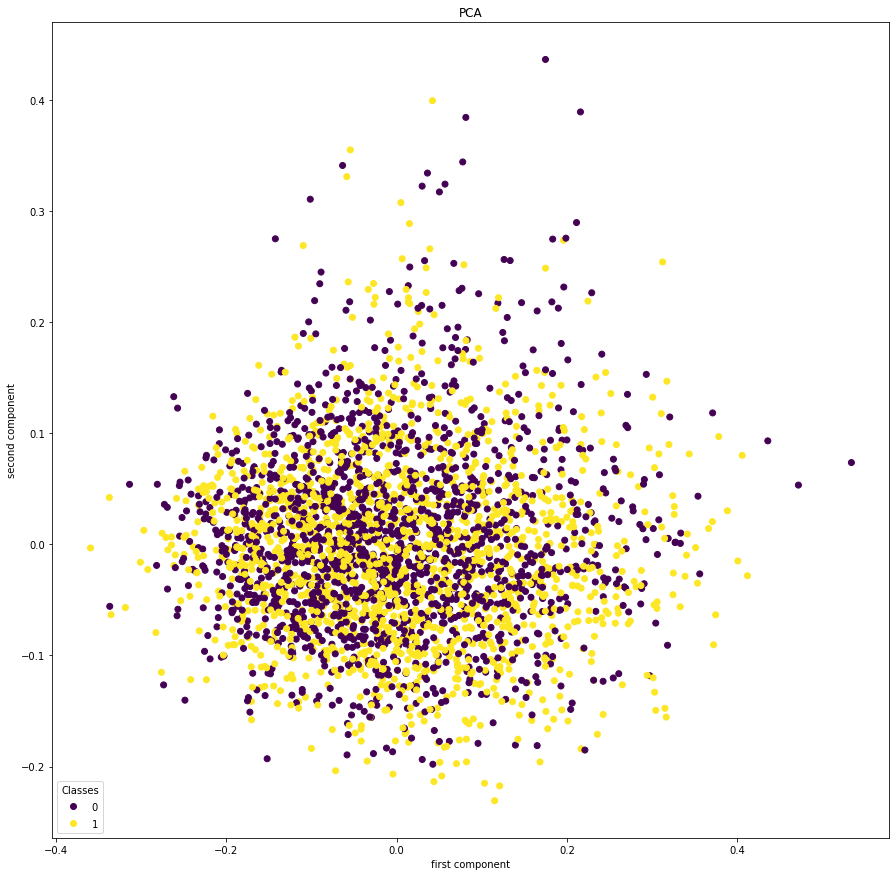

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plt.title('PCA')
plt.xlabel('first component')
plt.ylabel('second component')
scatter = plt.scatter(pca_features[:, 0], pca_features[:, 1], c=y_train.values)
plt.legend(*scatter.legend_elements(), loc='lower left', title='Classes')
plt.show()

Из [учебника](https://ysda_trove.gitlab.io/ml-handbook/chapters/hyperparameters_tuning/intro) вы узнали о библиотеках подбора параметров hyperopt и optuna.
Попробуйте применить любую из них в следующем блоке заданий.

Возможно, вы захотите воспользоваться реализацией [Sequential Feature Selection из sklearn](https://scikit-learn.org/stable/modules/feature_selection.html#sequential-feature-selection) для реализации отбора признаков, методом добавления.

**Задание 3** (2 балл)

    Проведите отбор признаков, методом добавления, обучая KNN-классификатор.
    
    Подберите лучшие параметры на отобранных признаках.
    
    Проведите перестановочную оценку влияния отобранных признаков


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=10, direction='forward')
sfs.fit(X_train, y_train)

In [ ]:
X_train.columns[sfs.get_support()]

Index(['A_148', 'A_173', 'A_204', 'A_207', 'A_268', 'A_325', 'A_358', 'A_374',
       'A_420', 'A_505'],
      dtype='object')

In [ ]:
new_columns = X_train.columns[sfs.get_support()]
X_train_new = X_train[new_columns]
X_train_new.head(5)

,A_148,A_173,A_204,A_207,A_268,A_325,A_358,A_374,A_420,A_505
3894,1.025399,0.850177,1.042028,0.879913,0.903956,0.987044,0.884524,0.905443,0.862479,0.828409
1175,0.926765,0.760168,1.029835,0.963835,0.881695,0.895824,0.929075,0.905250,0.821542,0.919076
721,0.955078,0.854499,1.096090,0.907078,0.905080,0.948309,0.909778,0.921932,0.884602,0.888655
1988,0.900065,0.854050,0.992909,0.824967,0.811869,0.958075,0.929963,0.923382,0.858699,0.856568
1924,0.930593,0.878290,1.076248,0.802738,0.829533,0.906321,0.929999,0.957803,0.855307,0.914081


In [ ]:
X_test_new = X_test[new_columns]
X_test_new.head(5)

,A_148,A_173,A_204,A_207,A_268,A_325,A_358,A_374,A_420,A_505
3540,0.893324,0.797909,1.020582,0.904142,0.886854,0.898562,0.897980,0.954257,0.884088,0.892398
3176,0.907144,0.857102,1.084267,0.826675,0.908225,0.929728,1.014104,0.870336,0.791430,0.864561
175,0.875433,0.880100,1.021434,0.802856,0.884674,0.864345,0.916572,0.895060,0.903391,0.850698
3054,0.855033,0.860507,1.019713,0.867998,0.876439,0.954430,0.969348,0.918142,0.823737,0.872976
2112,0.930863,0.816963,1.070634,0.926502,0.858828,0.927528,0.864311,0.893440,0.856640,0.873153


In [ ]:
!pip install git+https://github.com/hyperopt/hyperopt-sklearn

In [ ]:
!pip install hyperopt

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, KFold


def hyperopt_train_test(params):
    clf = KNeighborsClassifier(**params)
    return cross_val_score(clf, X_train_new, y_train,
                           cv=KFold(n_splits=5, shuffle=True, random_state=42),
                           scoring='roc_auc').mean()

metrics = ['manhattan', 'euclidean', 'chebyshev']
search_space = {
    'n_neighbors': hp.choice('n_neighbors', range(3,100)),
    'metric': hp.choice('metric', metrics)
}

def f(params):
    roc_auc = hyperopt_train_test(params)
    return {'loss': -roc_auc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, search_space, algo=tpe.suggest, max_evals=100, trials=trials)

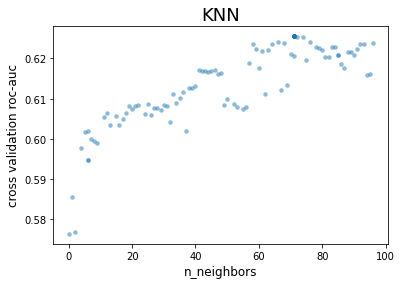

In [ ]:
f, ax = plt.subplots(1)
xs = [t['misc']['vals']['n_neighbors'] for t in trials.trials]
ys = [-t['result']['loss'] for t in trials.trials]
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5)
ax.set_title('KNN', fontsize=18)
ax.set_xlabel('n_neighbors', fontsize=12)
ax.set_ylabel('cross validation roc-auc', fontsize=12)
plt.show()

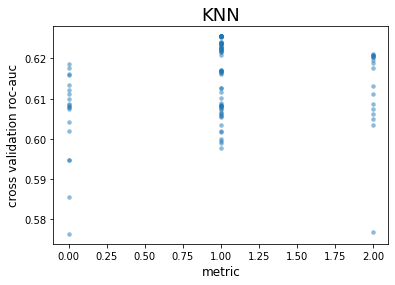

In [ ]:
f, ax = plt.subplots(1)
xs = [t['misc']['vals']['metric'] for t in trials.trials]
ys = [-t['result']['loss'] for t in trials.trials]
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5)
ax.set_title('KNN', fontsize=18)
ax.set_xlabel('metric', fontsize=12)
ax.set_ylabel('cross validation roc-auc', fontsize=12)
plt.show()

In [ ]:
print('best params: metric = {}, n_neighbors = {}'.format(
    metrics[best['metric']], best['n_neighbors']))
print('roc-auc =', max(ys))

best params: metric = euclidean, knn = 71
roc-auc = 0.6255032024374989


In [ ]:
from sklearn.inspection import permutation_importance

clf = KNeighborsClassifier(n_neighbors=71, metric='euclidean').fit(X_train_new, y_train)
r = permutation_importance(clf, X_train_new, y_train, scoring='roc_auc')

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print('Перестановочная оценка для обучающей выборки')
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f'{X_train_new.columns[i]:<8}'
        f'{r.importances_mean[i]:.3f}'
        f' +/- {r.importances_std[i]:.3f}')

Перестановочная оценка для обучающей выборки
A_358   0.064 +/- 0.008
A_505   0.029 +/- 0.003
A_173   0.028 +/- 0.005
A_204   0.013 +/- 0.005
A_420   0.011 +/- 0.003
A_374   0.010 +/- 0.005
A_148   0.010 +/- 0.002
A_207   0.009 +/- 0.002


In [ ]:
r = permutation_importance(clf, X_test_new, y_test, scoring='roc_auc')

print('Перестановочная оценка для тестовой выборки')
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f'{X_train_new.columns[i]:<8}'
        f'{r.importances_mean[i]:.3f}'
        f' +/- {r.importances_std[i]:.3f}')

Перестановочная оценка для тестовой выборки
A_358   0.038 +/- 0.007
A_505   0.023 +/- 0.008
A_173   0.021 +/- 0.008
A_268   0.016 +/- 0.007
A_207   0.012 +/- 0.006


**Задание 4** (2 балл)

    Проведите отбор признаков, методом добавления, обучая решающее дерево классификации.
    
    Подберите лучшие параметры на отобранных признаках.
    
    Проведите перестановочную оценку влияния отобранных признаков


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
sfs = SequentialFeatureSelector(dt, n_features_to_select=10, direction='forward')
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(max_depth=5),
                          n_features_to_select=10)

In [ ]:
new_columns = X_train.columns[sfs.get_support()]
X_train_new = X_train[new_columns]
X_train_new.head(5)

,A_003,A_080,A_091,A_121,A_181,A_340,A_358,A_367,A_409,A_473
3894,1.042413,0.888324,0.967735,0.906482,0.857509,0.802576,0.884524,0.893487,0.876281,0.880938
1175,1.124511,0.905170,0.933193,0.877580,0.890769,0.883282,0.929075,0.910403,0.906697,0.947432
721,1.005991,0.944969,0.999615,0.925205,0.928190,0.871589,0.909778,0.892869,0.870189,0.921269
1988,1.066661,0.908238,0.893523,0.940440,0.936165,0.853421,0.929963,0.974301,0.935186,0.915809
1924,1.087723,0.880562,0.859421,0.964261,0.920219,0.903008,0.929999,0.918659,0.917860,0.932520


In [ ]:
X_test_new = X_test[new_columns]
X_test_new.head(5)

,A_003,A_080,A_091,A_121,A_181,A_340,A_358,A_367,A_409,A_473
3540,1.045943,0.912851,0.927072,0.928575,0.907607,0.908698,0.897980,0.971818,0.886835,0.893135
3176,1.067080,0.901747,0.926639,0.971577,0.823875,0.879341,1.014104,0.920562,0.868359,0.983973
175,1.073979,0.890583,0.887325,0.940778,0.899252,0.809691,0.916572,0.970620,0.923060,0.903197
3054,1.055187,0.868033,0.942552,0.913845,0.870072,0.829830,0.969348,0.970525,0.857170,0.899755
2112,0.981520,0.948230,0.894301,0.877194,0.893381,0.763581,0.864311,0.905415,0.853392,0.945835


In [ ]:
def hyperopt_train_test(params):
    clf = DecisionTreeClassifier(**params)
    return cross_val_score(clf, X_train_new, y_train,
                           cv=KFold(n_splits=5, shuffle=True, random_state=42),
                           scoring='roc_auc').mean()

criterions = ['gini', 'entropy']
max_features = ['sqrt', 'log2']
search_space = {
    'criterion': hp.choice('criterion', criterions),
    'max_depth': hp.choice('max_depth', range(3,100)),
    'max_features': hp.choice('max_features', max_features)
}

def f(params):
    roc_auc = hyperopt_train_test(params)
    return {'loss': -roc_auc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, search_space, algo=tpe.suggest, max_evals=200, trials=trials)

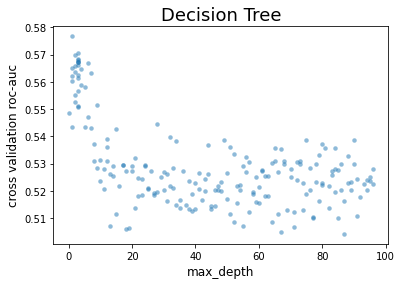

In [ ]:
f, ax = plt.subplots(1)
xs = [t['misc']['vals']['max_depth'] for t in trials.trials]
ys = [-t['result']['loss'] for t in trials.trials]
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5)
ax.set_title('Decision Tree', fontsize=18)
ax.set_xlabel('max_depth', fontsize=12)
ax.set_ylabel('cross validation roc-auc', fontsize=12)
plt.show()

In [ ]:
print('best params: criterion = {}, max_depth = {}, max_features = {}'.format(
    criterions[best['criterion']], best['max_depth'], max_features[best['max_features']]))
print('roc-auc =', max(ys))

best params: criterion = gini, max_depth = 1, max_features = log2
roc-auc = 0.5767287917650382


In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=1,
                             max_features='log2').fit(X_train_new, y_train)
r = permutation_importance(clf, X_train_new, y_train, scoring='roc_auc')

print('Перестановочная оценка для обучающей выборки')
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f'{X_train_new.columns[i]:<8}'
        f'{r.importances_mean[i]:.3f}'
        f' +/- {r.importances_std[i]:.3f}')

Перестановочная оценка для обучающей выборки
A_473   0.012 +/- 0.004


In [ ]:
r = permutation_importance(clf, X_test_new, y_test, scoring='roc_auc')

print('Перестановочная оценка для тестовой выборки')
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f'{X_test_new.columns[i]:<8}'
        f'{r.importances_mean[i]:.3f}'
        f' +/- {r.importances_std[i]:.3f}')

Перестановочная оценка для тестовой выборки


**Задание 5** (2 балл)
    
    Проведите отбор признаков, методом добавления, обучая классифкатор RandomForest.
    
    Подберите лучшие параметры на отобранных признаках.
    
    Проведите перестановочную оценку влияния отобранных признаков
    

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)
sfs = SequentialFeatureSelector(rf, n_features_to_select=10, direction='forward')
sfs.fit(X_train, y_train)

In [ ]:
new_columns = X_train.columns[sfs.get_support()]
X_train_new = X_train[new_columns]
X_train_new.head(5)

,A_137,A_292,A_311,A_336,A_358,A_382,A_418,A_440,A_468,A_505
3894,0.931385,0.905952,1.002016,0.954245,0.884524,1.000166,0.854495,0.938307,0.978072,0.828409
1175,0.922510,0.880338,1.025833,0.998193,0.929075,0.988419,0.831318,0.914544,0.976845,0.919076
721,0.982403,0.891190,0.936331,0.968877,0.909778,0.979462,0.806938,0.847014,0.980969,0.888655
1988,0.895885,0.898068,0.937578,0.893308,0.929963,1.015665,0.870084,0.917410,0.991018,0.856568
1924,0.959484,0.938655,0.997280,0.870588,0.929999,0.976726,0.866768,0.913797,0.977581,0.914081


In [ ]:
X_test_new = X_test[new_columns]
X_test_new.head(5)

,A_137,A_292,A_311,A_336,A_358,A_382,A_418,A_440,A_468,A_505
3540,0.952009,0.871704,0.924219,0.960025,0.897980,0.943472,0.859782,0.871474,1.048283,0.892398
3176,0.924296,0.848431,0.936704,0.906583,1.014104,0.973250,0.812192,0.936905,1.019974,0.864561
175,1.003545,0.917002,1.008405,0.909315,0.916572,0.953598,0.750656,0.985384,1.020638,0.850698
3054,0.953650,0.852158,0.976657,0.937390,0.969348,0.968450,0.891791,0.947863,1.007690,0.872976
2112,0.982136,0.896854,0.970491,0.945621,0.864311,0.984495,0.844444,0.957702,0.999119,0.873153


In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, KFold


def hyperopt_train_test(params):
    clf = RandomForestClassifier(n_jobs=-1, **params)
    return cross_val_score(clf, X_train_new, y_train,
                           cv=KFold(n_splits=5, shuffle=True, random_state=42),
                           scoring='roc_auc').mean()


search_space = {
    'n_estimators': hp.choice('n_estimators', range(2,50))
}

def f(params):
    roc_auc = hyperopt_train_test(params)
    return {'loss': -roc_auc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, search_space, algo=tpe.suggest, max_evals=100, trials=trials)

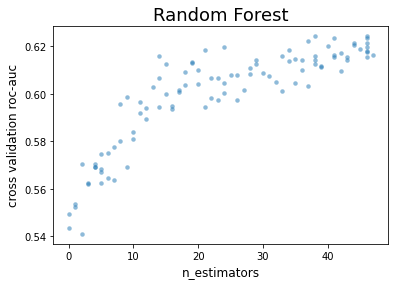

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1)
xs = [t['misc']['vals']['n_estimators'] for t in trials.trials]
ys = [-t['result']['loss'] for t in trials.trials]
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5)
ax.set_title('Random Forest', fontsize=18)
ax.set_xlabel('n_estimators', fontsize=12)
ax.set_ylabel('cross validation roc-auc', fontsize=12)
plt.show()

In [ ]:
print('best params: n_estimators = {}'.format(
    best['n_estimators']
))
print('roc-auc =', max(ys))

best params: n_estimators = 38
roc-auc = 0.6243115500738863


In [ ]:
from sklearn.inspection import permutation_importance

clf = RandomForestClassifier(n_estimators=38).fit(X_train_new, y_train)
r = permutation_importance(clf, X_train_new, y_train, scoring='roc_auc')

print('Перестановочная оценка для обучающей выборки')
for i in r.importances_mean.argsort()[::-1]:
    print(f'{X_train_new.columns[i]:<8}'
    f'{r.importances_mean[i]:.3f}'
    f' +/- {r.importances_std[i]:.3f}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Перестановочная оценка для обучающей выборки
A_358   0.107 +/- 0.003
A_505   0.029 +/- 0.002
A_382   0.021 +/- 0.001
A_137   0.013 +/- 0.001
A_311   0.008 +/- 0.000
A_468   0.006 +/- 0.000
A_336   0.005 +/- 0.000
A_292   0.005 +/- 0.000
A_418   0.003 +/- 0.000
A_440   0.002 +/- 0.000


In [ ]:
r = permutation_importance(clf, X_test_new, y_test, scoring='roc_auc')

print('Перестановочная оценка для тестовой выборки')
for i in r.importances_mean.argsort()[::-1]:
    print(f'{X_test_new.columns[i]:<8}'
    f'{r.importances_mean[i]:.3f}'
    f' +/- {r.importances_std[i]:.3f}')

Перестановочная оценка для тестовой выборки
A_358   0.022 +/- 0.009
A_382   0.020 +/- 0.007
A_311   0.017 +/- 0.007
A_137   0.010 +/- 0.009
A_440   0.007 +/- 0.007
A_468   0.005 +/- 0.011
A_418   0.002 +/- 0.007
A_292   -0.000 +/- 0.005
A_336   -0.004 +/- 0.005
A_505   -0.005 +/- 0.011


**Задание 6** (1.5 балл)
    При помощи библиотеки shap, отранжируйте признаки по степени их влияния для предсказаний модели из предыдущего пункта.
    Сопадает ли ранжирование по shap с ранжированием на основе перестановочных оценок? 

    Обучите классификатор RandomForest на всех признаках
    
    Попробуйте выкинуть хвост из "не влияющих" признаков.
    
    Что произойдет с качеством?
    
    Как пересекаются множества "выкинутых" факторов и факторов, которые не были добавлены в прошлом задании?
    
    

In [ ]:
rf = RandomForestClassifier(n_estimators=38)
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(n_estimators=38)

In [ ]:
!pip install shap

auto_size_plot=False is deprecated and is now ignored! Use plot_size=None instead.


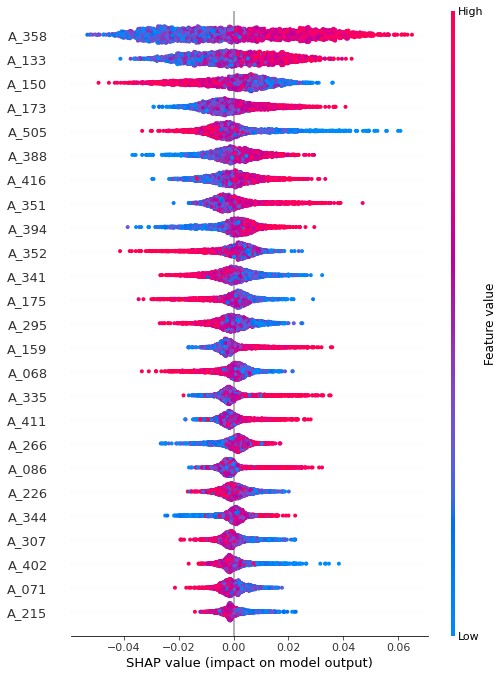

In [ ]:
import shap

shap_values = shap.Explainer(rf).shap_values(X_train)
shap.summary_plot(shap_values[1], X_train,
                      max_display=25, auto_size_plot=True, plot_type='dot')

In [ ]:
vals= np.abs(shap_values).mean(0)

feature_importance = pd.DataFrame(list(zip(features.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
feature_importance.head(10)

,col_name,feature_importance_vals
358,A_358,69.465430
133,A_133,40.603045
150,A_150,33.526231
173,A_173,26.386794
505,A_505,25.935982
388,A_388,20.951885
416,A_416,20.627076
351,A_351,19.942737
394,A_394,19.890871
352,A_352,18.615583


In [ ]:
from sklearn.model_selection import KFold

rf_shap = RandomForestClassifier(n_estimators=38)
roc_auc = cross_val_score(rf_shap, X_train[feature_importance['col_name'][:10].values], y_train,
                cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='roc_auc').mean()

In [ ]:
print("roc-auc on 10 best shape features: ", roc_auc)

roc-auc on 10 best shape features:  0.6391418603014769




*   В предыдущем пункте были найдены признаки методом добавления, обучая классифкатор RandomForest, и число деревье (38), при котором наибольшая оценка кросс валидации по метрике roc-auc. В этом пункте я взяла наилучшие 10 признаков, найденные с помощью библиотеки shape и RandomForest с числом деревьев 38. Лучшее качество получилось во втором случае.
*   Выше я делала предположение, что признак А_358 является одним из важных. Оказалось, что каждый рассмотренный алгоритм также использует его, а библиотека shape ставит его на первое место, поэтому можно добавить его в множество признаков, которые важны. Также можно отметить признак А_505, который встречается в 3 из 4 методов. Все остальные признаки не так часто пересекаются. Возможно, нужно рассмотреть большее число признаков (я рассматривала только 10).



**Задание 7** (0.5 балл)
    Сравните модели из заданий 3,4,5

Сравнение выбранных признаков было в пункте 6. Небольшое summary по методам (лучшие параметры):  
1) KNN: metric = euclidean, n_neighbors = 71, roc_auc = 0.625  
2) Decision tree: criterion = gini, max_depth = 1, max_features = log2, roc_auc = 0.577  
3) Random Forest: n_estimators = 38, roc_auc = 0.624  

Лучше всего по качеству показали себя KNN и Random Forest. Хотелось бы отметить, что решающее дерево по факту является решающим пнем по признаку А_473 и дает качество 0.577, что не сильно меньше относительно других полученных roc_auc. Стоит присмотреть к данному признаку и поиследовать его. Возможно, что добавление к нему признаков приведет к большему качеству.

**Задание 8** (2 балл)
    Постройте линейный ансамбль из лучших моделей.

**Задание 9** (2 балл)
    Постройте ансамбль из лучших моделей при помощи какой-либо реализации GBDT, например -- lightgbm или catboost

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier()
cat_roc_auc_ = cross_val_score(cat_clf, X_train[feature_importance['col_name'][:10].values],
                               y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='roc_auc').mean()

In [109]:
print("CatBoost roc_auc = ", cat_roc_auc_)

CatBoost roc_auc =  0.6626233594564592


**Задание 10** (0.5 балл)
    Сделайте вывод, помогло ли ансамблирование победить лучшие модели. В чем могут быть причины?

Ансамблирование (catboost, бэггинг) позволило улучшить roc_auc на 0.04. Чтобы получить лучшее качество, нужно попробовать добавить больше признаков. Почему бэггинг увеличил качество? Потому что последовательно строятся модели, которые бы минимизировали ошибку от предыдущих построенных моделей.